<a href="https://colab.research.google.com/github/marqub/gbif-species-distribution-analysis/blob/main/notebooks/phase-1-data-exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
# Install the pandas-profiling library from the master branch on GitHub
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 
# Install the necessary libraries for the project
!pip install numpy pandas streamlit gdown pyarrow
# Install git, in case it is not already installed
!pip install git
# Upgrade the pandas-profiling library
!pip install --upgrade pandas-profiling
# Show the version of the pandas-profiling library that is currently installed
!pip show pandas-profiling
# Install pytz, a library for timezone handling
!pip install pytz
!pip install squarify

In [2]:
# Import the markupsafe library
import markupsafe
print(markupsafe.__version__)
# Import necessary libraries for the project
import pandas as pd
import numpy as np
# Import the git library for version control
import git
# Import the os library for file and directory management
import os
# Import the zipfile library to handle zip files
import zipfile
# Import the ProfileReport class from the pandas_profiling library for creating profiling reports
from pandas_profiling import ProfileReport
# Import the pytz library for timezone handling
import pytz as tz

2.0.1


In [3]:
# Show all columns (instead of cascading columns in the middle)
pd.set_option("display.max_columns", None)
# Don't show numbers in scientific notation
pd.set_option("display.float_format", "{:.2f}".format)

In [4]:
#!curl -s https://packagecloud.io/install/repositories/github/git-lfs/script.deb.sh | sudo bash
#!sudo apt-get install git-lfs
#!git lfs install --skip-smudge
#!git clone https://github.com/marqub/gbif-species-distribution-analysis.git

In [5]:
# Load GBIF dataset
# os.chdir("gbif-species-distribution-analysis/data")
# !git lfs pull --include="gbif_data_2016to2022_northamerica_CC.csv.zip"

In [6]:
cd /content/drive/MyDrive/data

/content/drive/MyDrive/data


In [7]:
#os.chdir("gbif-species-distribution-analysis/data")

#with zipfile.ZipFile("gbif_data_2016to2022_northamerica_CC.csv.zip", "r") as zip_ref:
#    zip_ref.extractall(".")

In [8]:
df = pd.read_csv("0246602-220831081235567.csv", sep='\t', on_bad_lines='skip')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,10,14,16,17,19,23,24,25,36,37,38,39,40,41,43,44,45,46,48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
# Explore the data
# Use df.info() to get a summary of the data types and missing values in the dataset
df.info()
# df.info() does not display the non-null count for each column because the dataframe contains too many rows
# Use df.head() to view the first few rows of the dataset
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4675566 entries, 0 to 4675565
Data columns (total 50 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   gbifID                            int64  
 1   datasetKey                        object 
 2   occurrenceID                      object 
 3   kingdom                           object 
 4   phylum                            object 
 5   class                             object 
 6   order                             object 
 7   family                            object 
 8   genus                             object 
 9   species                           object 
 10  infraspecificEpithet              object 
 11  taxonRank                         object 
 12  scientificName                    object 
 13  verbatimScientificName            object 
 14  verbatimScientificNameAuthorship  object 
 15  countryCode                       object 
 16  locality                          ob

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,taxonRank,scientificName,verbatimScientificName,verbatimScientificNameAuthorship,countryCode,locality,stateProvince,occurrenceStatus,individualCount,publishingOrgKey,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,coordinatePrecision,elevation,elevationAccuracy,depth,depthAccuracy,eventDate,day,month,year,taxonKey,speciesKey,basisOfRecord,institutionCode,collectionCode,catalogNumber,recordNumber,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,1930479050,d415c253-4d61-4459-9d25-4015b9084fb0,bfc07e69-59f3-4ec5-8890-4df46fc8b293,Fungi,Ascomycota,Lecanoromycetes,Lecanorales,Cladoniaceae,Cladonia,Cladonia apodocarpa,NaN,SPECIES,Cladonia apodocarpa Robb.,Cladonia apodocarpa Robbins,Robbins,US,James D. Martin – Skyline Wildlife Management ...,Alabama,PRESENT,NaN,ae447c50-b8a8-11d8-92a4-b8a03c50a862,34.87,-86.14,NaN,NaN,NaN,NaN,NaN,NaN,2017-05-19T00:00:00,19.00,5.00,2017.00,3391449.00,3391449.00,PRESERVED_SPECIMEN,NY,NY,03218863,52530,J. C. Lendemer,2018-01-01T00:00:00,CC0_1_0,The New York Botanical Garden,J. C. Lendemer,NaN,NaN,2023-01-11T13:29:42.579Z,StillImage,GEODETIC_DATUM_ASSUMED_WGS84;COLLECTION_MATCH_...
1,3328180681,d415c253-4d61-4459-9d25-4015b9084fb0,c74f5b5e-0c90-4f1e-8f96-1a75f99fdd00,Fungi,Ascomycota,Lecanoromycetes,Lecanorales,Catillariaceae,Catillaria,Catillaria nigroclavata,NaN,SPECIES,Catillaria nigroclavata (Nyl.) Schuler,Catillaria nigroclavata (Nyl.) Schuler,(Nyl.) Schuler,US,"Pisgah National Forest, Bald Mountains, W-faci...",North Carolina,PRESENT,NaN,ae447c50-b8a8-11d8-92a4-b8a03c50a862,35.83,-82.94,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-23T00:00:00,23.00,10.00,2019.00,2607504.00,9117432.00,PRESERVED_SPECIMEN,NY,NY,04258535,62601,J. C. Lendemer,2019-01-01T00:00:00,CC0_1_0,The New York Botanical Garden,J. C. Lendemer,NaN,NaN,2023-01-11T13:29:43.944Z,StillImage,GEODETIC_DATUM_ASSUMED_WGS84;COLLECTION_MATCH_...
2,3422300410,d415c253-4d61-4459-9d25-4015b9084fb0,38619449-806c-4521-afd5-d9eff75972a4,Fungi,Ascomycota,Lecanoromycetes,Pertusariales,Pertusariaceae,Pertusaria,Pertusaria paratuberculifera,NaN,SPECIES,Pertusaria paratuberculifera Dibben,Pertusaria paratuberculifera Dibben,Dibben,US,"Great Smoky Mountains National Park, Foothills...",Tennessee,PRESENT,NaN,ae447c50-b8a8-11d8-92a4-b8a03c50a862,35.77,-83.56,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-18T00:00:00,18.00,10.00,2021.00,3411752.00,3411752.00,PRESERVED_SPECIMEN,NY,NY,04284937,71647,J. C. Lendemer,2021-01-01T00:00:00,CC0_1_0,The New York Botanical Garden,J. C. Lendemer,NaN,NaN,2023-01-11T13:30:24.353Z,StillImage,GEODETIC_DATUM_ASSUMED_WGS84;COLLECTION_MATCH_...
3,2235426236,d415c253-4d61-4459-9d25-4015b9084fb0,c9dec564-90b8-44ce-b171-888e60532983,Fungi,Ascomycota,Lecanoromycetes,Peltigerales,Lobariaceae,Ricasolia,Ricasolia quercizans,NaN,SPECIES,Lobaria quercizans Michx.,Lobaria quercizans Michx.,Michx.,US,"Great Smoky Mountains National Park, N slopes ...",Tennessee,PRESENT,NaN,ae447c50-b8a8-11d8-92a4-b8a03c50a862,35.56,-83.74,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-11T00:00:00,11.00,12.00,2017.00,7086259.00,6337981.00,PRESERVED_SPECIMEN,NY,NY,03861913,8002,E. A. Tripp,2017-12-13T00:00:00,CC0_1_0,The New York Botanical Garden,E. A. Tripp;J. C. Lendemer,NaN,NaN,2023-01-11T13:29:44.652Z,StillImage,GEODETIC_DATUM_ASSUMED_WGS84;COLLECTION_MATCH_...
4,3328180691,d415c253-4d61-4459-9d25-4015b9084fb0,ce31fe91-27d7-4846-a15e-b0cfd46a7fce,Fungi,Ascomycota,Lecanoromycetes,Lecanorales,Parmeliaceae,Melanohalea,Melanohalea halei,NaN,SPECIES,"Melanohalea halei (Ahti) O.Blanco, A.Crespo, D...","Melanohalea halei (Ahti) O.Blanco, A.Crespo, D...","(Ahti) O.Blanco, A.Crespo, Divakar, Essl., D.H...",US,"Pisgah National Forest, Bald Mountains, S-slop...",North Carolina,PRESENT,NaN,ae447c50-b8a8-11d8-92a4-b8a03c50a862,35.95,-82.79,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-17T00:00:00,17.00,8.00,2020.00,2605328.00,2605

In [10]:
# Split the values in the 'issue' column by ';'
tokens = df['issue'].str.split(';', expand=True).stack()
# Count the occurrences of each token
counts = tokens.value_counts()
# Print the counts
print(counts)

CONTINENT_DERIVED_FROM_COORDINATES                   4341570
GEODETIC_DATUM_ASSUMED_WGS84                         1976773
COORDINATE_ROUNDED                                   1603999
GEODETIC_DATUM_INVALID                               1134822
REFERENCES_URI_INVALID                                587791
INSTITUTION_MATCH_FUZZY                               326699
COLLECTION_MATCH_FUZZY                                266620
DIFFERENT_OWNER_INSTITUTION                           192224
OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COUNT      184592
OCCURRENCE_STATUS_UNPARSABLE                          171696
RECORDED_DATE_INVALID                                 155747
TAXON_MATCH_HIGHERRANK                                149980
INSTITUTION_MATCH_NONE                                 96314
TAXON_MATCH_NONE                                       72634
INSTITUTION_COLLECTION_MISMATCH                        63484
AMBIGUOUS_COLLECTION                                   50552
COUNTRY_DERIVED_FROM_COO

In [11]:
# Iterate over the specified columns
for col in ['gbifID', 'datasetKey', 'occurrenceID']:
    # Count the number of unique values in the column
    uniq = df[col].nunique()
    # Count the number of non-null values in the column
    nonnull = df[col].count()
    # Print the results
    print(f"Column {col}: {uniq} unique values, {nonnull} non-null values")

Column gbifID: 4675566 unique values, 4675566 non-null values
Column datasetKey: 933 unique values, 4675566 non-null values
Column occurrenceID: 4675124 unique values, 4675561 non-null values


In [12]:
df = df.drop(columns=[
    "verbatimScientificNameAuthorship",
    "verbatimScientificName",
    "recordNumber",
    "catalogNumber",
    "taxonKey",
    "speciesKey",
    "year",
    "month",
    "day",
    "datasetKey",
    "occurrenceID"
])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4675566 entries, 0 to 4675565
Data columns (total 39 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   gbifID                         int64  
 1   kingdom                        object 
 2   phylum                         object 
 3   class                          object 
 4   order                          object 
 5   family                         object 
 6   genus                          object 
 7   species                        object 
 8   infraspecificEpithet           object 
 9   taxonRank                      object 
 10  scientificName                 object 
 11  countryCode                    object 
 12  locality                       object 
 13  stateProvince                  object 
 14  occurrenceStatus               object 
 15  individualCount                object 
 16  publishingOrgKey               object 
 17  decimalLatitude                float64
 18  de

In [13]:
# some of the properties have low cardinality... If I can not extrapolate or makes sense of the values, better to drop them.
# Create a list of tuples containing the column name and its null value ratio
ratios = [(col, round(df[col].isnull().sum() / df[col].shape[0], 2)) for col in df.columns]
# Sort the list by the null value ratio
from operator import itemgetter
ratios = sorted(ratios, key=itemgetter(1), reverse=True)

print(f"Non-Null Count:\n{df.count()}\n")
# Print the sorted list
print("\n".join(f"{col} {ratio}" for col, ratio in ratios))

Non-Null Count:
gbifID                           4675566
kingdom                          4675566
phylum                           4551730
class                            3736639
order                            4419856
family                           4391759
genus                            3957814
species                          3584776
infraspecificEpithet               78706
taxonRank                        4675566
scientificName                   4675566
countryCode                      4675517
locality                         2681557
stateProvince                    2627583
occurrenceStatus                 4675566
individualCount                   812484
publishingOrgKey                 4675566
decimalLatitude                  4625931
decimalLongitude                 4625931
coordinateUncertaintyInMeters    1861541
coordinatePrecision                 3943
elevation                        1060190
elevationAccuracy                 825476
depth                            1156540


In [14]:
df = df.drop(columns=["coordinatePrecision",
                     "typeStatus",
                     "depthAccuracy",
                     "establishmentMeans",
                     "mediaType",
                     "elevationAccuracy",
                     "coordinateUncertaintyInMeters",
                     "rightsHolder",
                     "identifiedBy",
                     "license",
                     "recordedBy",
                     "collectionCode",
                     "institutionCode"])

In [15]:
#let's rename and give more meaningfull names
dateColumnNames = {"lastInterpreted":"lastInterpretationDate","dateIdentified":"identificationDate","eventDate":"eventObservationDate"}
df = df.rename(columns=dateColumnNames)

env_columns = ["countryCode","locality","stateProvince","decimalLatitude","decimalLongitude","elevation","depth","eventObservationDate"]
meta_columns = ["occurrenceStatus","individualCount","basisOfRecord","typeStatus","establishmentMeans","lastInterpretationDate","publishingOrgKey","identificationDate"]
species_colums=["kingdom","phylum","class","order","family","genus","species","infraspecificEpithet","taxonRank","scientificName","issue"]

df = df.rename(columns={col:"env_"+col for col in env_columns})
df = df.rename(columns={col:"meta_"+col for col in meta_columns})
df = df.rename(columns={col:"species_"+col for col in species_colums})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4675566 entries, 0 to 4675565
Data columns (total 26 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   gbifID                        int64  
 1   species_kingdom               object 
 2   species_phylum                object 
 3   species_class                 object 
 4   species_order                 object 
 5   species_family                object 
 6   species_genus                 object 
 7   species_species               object 
 8   species_infraspecificEpithet  object 
 9   species_taxonRank             object 
 10  species_scientificName        object 
 11  env_countryCode               object 
 12  env_locality                  object 
 13  env_stateProvince             object 
 14  meta_occurrenceStatus         object 
 15  meta_individualCount          object 
 16  meta_publishingOrgKey         object 
 17  env_decimalLatitude           float64
 18  env_decimalLongitude  

In [16]:
dateColumnNames = ["meta_lastInterpretationDate", "meta_identificationDate", "env_eventObservationDate"]

# Iterate over the date columns
for col in dateColumnNames:
    # Convert the data in the column to datetime format
    df[col] = pd.to_datetime(
        df[col], 
        # Infer the datetime format
        infer_datetime_format=True, 
        # Set the timezone to UTC
        utc=True, 
        # Handle errors by replacing invalid data with NaT
        errors="coerce"
    )

In [17]:
# Get the object columns in the DataFrame
object_columns = df.select_dtypes(include=['object']).columns.tolist()

# Iterate over the object columns
for col in object_columns:
    # Calculate the ratio of unique values to rows in the column
    ratio = df[col].nunique() / df[col].count()
    # Print the ratio
    print(f"Ratio of unique values to rows for column '{col}': {ratio:.2f}")

Ratio of unique values to rows for column 'species_kingdom': 0.00
Ratio of unique values to rows for column 'species_phylum': 0.00
Ratio of unique values to rows for column 'species_class': 0.00
Ratio of unique values to rows for column 'species_order': 0.00
Ratio of unique values to rows for column 'species_family': 0.00
Ratio of unique values to rows for column 'species_genus': 0.01
Ratio of unique values to rows for column 'species_species': 0.02
Ratio of unique values to rows for column 'species_infraspecificEpithet': 0.06
Ratio of unique values to rows for column 'species_taxonRank': 0.00
Ratio of unique values to rows for column 'species_scientificName': 0.02
Ratio of unique values to rows for column 'env_countryCode': 0.00
Ratio of unique values to rows for column 'env_locality': 0.04
Ratio of unique values to rows for column 'env_stateProvince': 0.00
Ratio of unique values to rows for column 'meta_occurrenceStatus': 0.00
Ratio of unique values to rows for column 'meta_individua

In [18]:
# Convert the object columns to categorical
df[object_columns] = df[object_columns].astype('category')

In [19]:
# Get the float columns in the DataFrame
floats = df.select_dtypes(include=['float64']).columns.tolist()

# Convert the float columns to a smaller data type
df[floats] = df[floats].apply(pd.to_numeric, downcast='float')

df[floats].info()

# elevation should be a float too but there is some textual values
df['env_elevation'] = pd.to_numeric(df['env_elevation'], downcast='float', errors='coerce')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4675566 entries, 0 to 4675565
Data columns (total 3 columns):
 #   Column                Dtype  
---  ------                -----  
 0   env_decimalLatitude   float32
 1   env_decimalLongitude  float32
 2   env_depth             float32
dtypes: float32(3)
memory usage: 53.5 MB


In [20]:
print(df[['env_depth', 'env_elevation']].describe().loc[['min', 'max']])

     env_depth  env_elevation
min       0.00        -330.00
max    2067.00       16917.50


In [21]:
df = df.rename(columns={"env_depth": "env_depthInMeters", "env_elevation": "env_elevationInMeters"})
df[['env_depthInMeters', 'env_elevationInMeters']] = (df[['env_depthInMeters', 'env_elevationInMeters']] * 0.3048).fillna(0).round(1).astype("float32")

In [22]:
import numpy as np

# Replace NaN values in 'meta_individualCount' column with 1
df['meta_individualCount'].fillna(1, inplace=True)
# Convert the 'meta_individualCount' column to integer type and handle errors
df['meta_individualCount'] = pd.to_numeric(df['meta_individualCount'], downcast='integer', errors='coerce')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4675566 entries, 0 to 4675565
Data columns (total 26 columns):
 #   Column                        Dtype              
---  ------                        -----              
 0   gbifID                        int64              
 1   species_kingdom               category           
 2   species_phylum                category           
 3   species_class                 category           
 4   species_order                 category           
 5   species_family                category           
 6   species_genus                 category           
 7   species_species               category           
 8   species_infraspecificEpithet  category           
 9   species_taxonRank             category           
 10  species_scientificName        category           
 11  env_countryCode               category           
 12  env_locality                  category           
 13  env_stateProvince             category           
 14  me

In [24]:
# Save the cleaned and filtered data to a new file
df.to_csv('cleaned_data.csv', index=False)

In [25]:
# Generate an interactive HTML report
#profile = ProfileReport(df, title="Pandas Profiling Report")
# Display the report
#profile.to_notebook_iframe()

DONE

Possible next steps:

- Compute some statistical analysis, such as simple metrics, but also tests (average time between observation and interpretation, per kingdom, per country, per organization, etc.).
- Find correlations, such as the impact of food on population, the impact of bacteria/virus on some populations, and the correlation or non-correlation between species.
```  
#filtered_df2 = df[df.applymap(lambda x: "virus" in str(x)).any(1)]
#filtered_df3 = df[df.applymap(lambda x: "bacteria" in str(x)).any(1)]
```
- Train a model to predict future occurrences based on previous ones, and when: the occurrence could be a disease, or the presence/absence of food, etc.


California : species_kingdom
Animalia         306937.00
Plantae          153761.00
Fungi              7144.00
Chromista          4951.00
incertae sedis     2400.00
Name: meta_individualCount, dtype: float64
New York : species_kingdom
Plantae          247714.00
Animalia         148752.00
Fungi              5516.00
Protozoa            140.00
incertae sedis       56.00
Name: meta_individualCount, dtype: float64
Florida : species_kingdom
Animalia         193062.00
Plantae           19044.00
incertae sedis     3705.00
Fungi               882.00
Bacteria            732.00
Name: meta_individualCount, dtype: float64
Texas : species_kingdom
Animalia         209277.00
Plantae           43375.00
incertae sedis     7259.00
Fungi               514.00
Bacteria             22.00
Name: meta_individualCount, dtype: float64
Colorado : species_kingdom
Animalia         53833.00
Plantae          36336.00
Fungi             1886.00
incertae sedis    1507.00
Protozoa             4.00
Name: meta_individualCoun

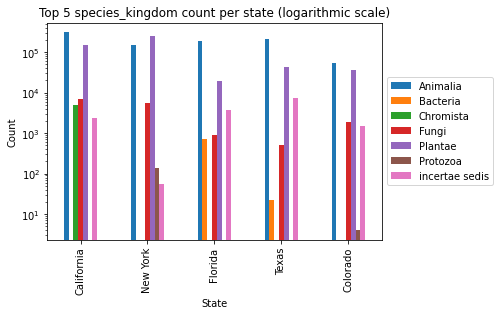

In [26]:
import matplotlib.pyplot as plt

# Create a new dataframe with only observations from the US
df_us = df[df['env_countryCode']=="US"]

# Group the data by state and get the top 5 states with the most observations
top_states = df_us.groupby(["env_stateProvince"]).size().sort_values(ascending=False).head(5)

# Create a dictionary to store the top 5 species for each state
top_species_per_state = {}

# Iterate through the top states and get the top 5 species for each state
for state in top_states.index:
    top_species_per_state[state] = df_us[df_us['env_stateProvince'] == state].groupby("species_kingdom").meta_individualCount.sum().nlargest(5).sort_values(ascending=False)

# Print the top 5 species for each state
for state, species in top_species_per_state.items():
    print(f"{state} : {species}")

# Convert the dictionary to a dataframe
df_top_species = pd.DataFrame.from_dict(top_species_per_state)

# Transpose the dataframe
df_top_species_transposed = df_top_species.transpose()

# Create a bar plot of the data with a logarithmic y-axis
ax = df_top_species_transposed.plot.bar()
ax.set_yscale('log')

# Add axis labels and a title
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Top 5 species_kingdom count per state (logarithmic scale)')

# Add a legend
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()


In [27]:
# create a dictionary to store the top 5 classes for each state
top_classes_per_state = {}

for state in top_states.index:
    # create a new dataframe for the current state
    df_state = df_us[df_us['env_stateProvince'] == state]
    # group by kingdom and class, and count the number of observations
    classes_count = df_state.groupby(["species_kingdom", "species_class"])["meta_individualCount"].sum()
    # for the Animalia, get the top 5 classes by count
    animalia_classes = classes_count.loc["Animalia"].nlargest(5)
    # add the top classes for each kingdom to the dictionary
    top_classes_per_state[state] = {"Animalia": animalia_classes}

# print the top classes for each state
for state, classes in top_classes_per_state.items():
    print(state + ":")
    print("Animals:", classes["Animalia"])


California:
Animals: species_class
Aves         107259.00
Insecta       65146.00
Bivalvia      38922.00
Gastropoda    29224.00
Mammalia      16818.00
Name: meta_individualCount, dtype: float64
New York:
Animals: species_class
Amphibia   125861.00
Insecta     11393.00
Aves         5140.00
Mammalia      745.00
Bivalvia      730.00
Name: meta_individualCount, dtype: float64
Florida:
Animals: species_class
Insecta          28226.00
Anthozoa         10959.00
Aves              9939.00
Elasmobranchii    3443.00
Mammalia          3200.00
Name: meta_individualCount, dtype: float64
Texas:
Animals: species_class
Insecta     51204.00
Aves        11567.00
Mammalia     5276.00
Squamata     2573.00
Arachnida    2227.00
Name: meta_individualCount, dtype: float64
Colorado:
Animals: species_class
Insecta        37511.00
Mammalia        6418.00
Aves            2726.00
Clitellata      1532.00
Malacostraca    1389.00
Name: meta_individualCount, dtype: float64


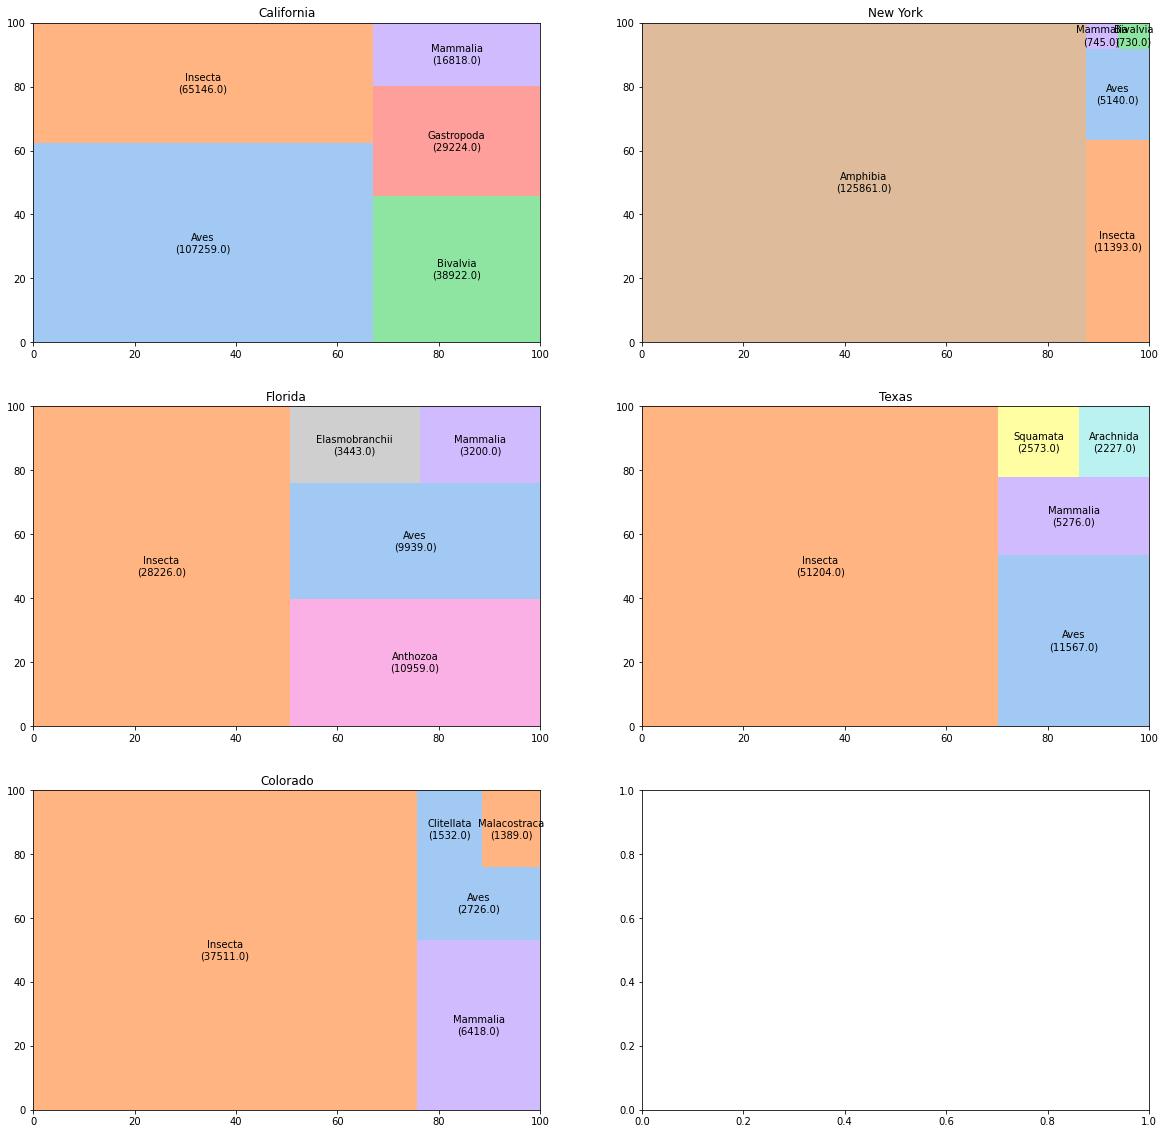

In [31]:
import seaborn as sns
import squarify

def assign_colors(species_class):
    """
    Assign a color to a species class if it hasn't been assigned one yet.
    """
    if species_class not in class_colors:
        class_colors[species_class] = color_pool[0]
        color_pool.remove(class_colors[species_class])
    return class_colors[species_class]

def plot_treemap(ax, state, species_class, species_class_counts):
    """
    Plot a treemap of the species classes and their counts for a given state.
    """
    colors = [assign_colors(sc) for sc in species_class]
    labels = [f"{sc}\n({scc})" for sc, scc in zip(species_class, species_class_counts)]
    squarify.plot(sizes=species_class_counts, label=labels, color=colors, ax=ax)
    ax.set_title(state)

# Create a figure with 3 rows and 2 columns of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,20))

# Flatten the list of axes
axes_list = [item for sublist in axes for item in sublist] 

# Create a color palette
color_pool = sns.color_palette("pastel", 30)

# Initialize an empty dictionary to store the assigned colors for each species class
class_colors = {}

# Iterate over the top states
for i, state in enumerate(top_states.index):
    # Get the species classes and their counts for the current state
    species_classes = top_classes_per_state[state]["Animalia"].index
    species_class_counts = top_classes_per_state[state]["Animalia"].values
    plot_treemap(axes_list[i], state, species_classes, species_class_counts)

# Show the plot
plt.show()

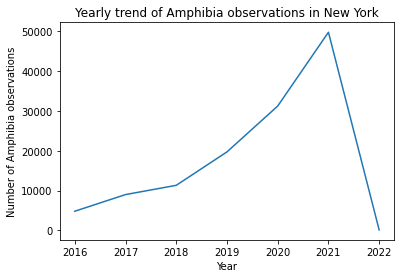

In [29]:
df_ny = df_us[df_us['env_stateProvince'] == "New York"]
df_ny_amphibia = df_ny[df_ny['species_class'] == "Amphibia"]

yearly_counts = df_ny_amphibia.groupby(df_ny_amphibia['env_eventObservationDate'].dt.year)['meta_individualCount'].sum()

plt.plot(yearly_counts.index, yearly_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Amphibia observations')
plt.title('Yearly trend of Amphibia observations in New York')
plt.show()




In [30]:
# average time between observation and interpretation per country per year
average_time_diff = df.assign(time_diff = pd.to_datetime(df['meta_lastInterpretationDate']) - pd.to_datetime(df['env_eventObservationDate']),
                              year = pd.to_datetime(df['env_eventObservationDate']).dt.year)\
                      .groupby(['env_countryCode','year']).time_diff.mean().reset_index()
average_time_diff[average_time_diff["env_countryCode"].isin(["US", "CA"]) & (average_time_diff["year"]>=2016)].head(20)



,env_countryCode,year,time_diff
257,CA,2016.00,2355 days 22:26:29.989141056
258,CA,2017.00,2023 days 22:48:38.912059552
259,CA,2018.00,1640 days 05:31:29.202300800
260,CA,2019.00,1270 days 11:43:56.424310736
261,CA,2020.00,918 days 08:11:05.894907296
262,CA,2021.00,574 days 09:59:39.731261304
263,CA,2022.00,200 days 06:25:50.745518120
1115,US,2016.00,2376 days 05:34:31.580827040
1116,US,2017.00,2012 days 05:03:37.967410752
1117,US,2018.00,1645 days 16:11:25.036881408
